In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from datetime import datetime
from IPython.display import Image, display
from scipy import stats

In [4]:
os.chdir(r"C:\Users\amash\disease-risk\reports\figures\after_preprocessed")

In [6]:
df = pd.read_csv(r"C:\Users\amash\disease-risk\data\processed\preprocessed_data.csv")
df.head()

,age,gender,waist_size,blood_pressure,cholesterol,glucose,insulin,sleep_hours,physical_activity,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,stress_level,family_history,target
0,56,Male,72.165130,118.264254,214.580523,103.008176,14.983414,6.475885,0.356918,2673.546960,44.476887,Occasionally,Non-smoker,2,No,healthy
1,69,Female,85.598889,117.917986,120.081375,116.905134,10.131597,8.428410,0.568219,2650.376972,74.663405,Regularly,Light,3,Yes,healthy
2,46,Male,90.295030,123.073698,138.134787,89.180302,14.983414,5.702164,3.764406,1746.755144,19.702382,Regularly,Heavy,0,No,healthy
3,32,Female,100.504211,148.173453,203.017447,128.375798,18.733179,5.188316,0.889474,2034.193242,82.580050,Occasionally,Heavy,10,No,healthy
4,60,Female,69.021150,150.613181,200.412439,94.813332,16.038701,7.912514,2.901608,2386.210257,45.961322,Occasionally,Heavy,9,Yes,healthy


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   waist_size           100000 non-null  float64
 3   blood_pressure       100000 non-null  float64
 4   cholesterol          100000 non-null  float64
 5   glucose              100000 non-null  float64
 6   insulin              100000 non-null  float64
 7   sleep_hours          100000 non-null  float64
 8   physical_activity    100000 non-null  float64
 9   calorie_intake       100000 non-null  float64
 10  sugar_intake         100000 non-null  float64
 11  alcohol_consumption  100000 non-null  object 
 12  smoking_level        100000 non-null  object 
 13  stress_level         100000 non-null  int64  
 14  family_history       100000 non-null  object 
 15  target            

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Numeric columns ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")



Numeric columns (11): ['age', 'waist_size', 'blood_pressure', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'physical_activity', 'calorie_intake', 'sugar_intake', 'stress_level']
Categorical columns (5): ['gender', 'alcohol_consumption', 'smoking_level', 'family_history', 'target']


In [9]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} categories")


gender: 2 categories
alcohol_consumption: 2 categories
smoking_level: 3 categories
family_history: 2 categories
target: 2 categories


In [70]:
print(os.getcwd())

C:\Users\amash\disease-risk\reports\figures\after_preprocessed


In [71]:
os.chdir(r"C:\Users\amash\disease-risk\reports\figures\after_preprocessed")

In [72]:
# Initialize dictionaries to store label mappings
label_mappings = {}

# Create a copy of the dataframe
df_encoded = df.copy()

# Identify categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns

print(f"Found {len(categorical_columns)} categorical columns:")
print(list(categorical_columns))

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    
    # Encode the column
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    
    # Store the mapping
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"Encoded {col}: {label_mappings[col]}")

encoded_file_path = 'reports/figures/after_preprocessed/encoded_dataset.csv'
df_encoded.to_csv(encoded_file_path, index=False)
print(f"\nEncoded dataset saved to: {encoded_file_path}")

mappings_file_path = 'reports/figures/after_preprocessed/label_mappings.csv'

mappings_data = []
for column, mapping in label_mappings.items():
    for label, encoded_value in mapping.items():
        mappings_data.append({
            'Column': column,
            'Original_Label': label,
            'Encoded_Value': encoded_value
        })

mappings_df = pd.DataFrame(mappings_data)
mappings_df.to_csv(mappings_file_path, index=False)
print(f"Label mappings saved to: {mappings_file_path}")

print(f"\nSummary:")
print(f"Original dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")
print(f"Encoded {len(categorical_columns)} categorical columns")

Found 18 categorical columns:
['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner', 'target']
Encoded gender: {'Female': 0, 'Male': 1}
Encoded sleep_quality: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3}
Encoded alcohol_consumption: {'Occasionally': 0, 'Regularly': 1}
Encoded smoking_level: {'Heavy': 0, 'Light': 1, 'Non-smoker': 2}
Encoded mental_health_support: {'No': 0, 'Yes': 1}
Encoded education_level: {'Bachelor': 0, 'High School': 1, 'Master': 2, 'PhD': 3}
Encoded job_type: {'Healthcare': 0, 'Labor': 1, 'Office': 2, 'Service': 3, 'Tech': 4, 'Unemployed': 5}
Encoded occupation: {'Artist': 0, 'Doctor': 1, 'Driver': 2, 'Engineer': 3, 'Farmer': 4, 'Teacher': 5}
Encoded diet_type: {'Keto': 0, 'Omnivore': 1, 'Vegan': 2, 'Vegetarian': 3}
Encoded exerci

OSError: Cannot save file into a non-existent directory: 'reports\figures\after_preprocessed'

In [62]:
#rounding off numerical variables 6 decimal places
def round_numerical_variables(df, decimal_places=6):
    df_rounded = df.copy()
    
    # Identify numerical columns (exclude object, category, etc.)
    numerical_columns = df_rounded.select_dtypes(include=[np.number]).columns
    
    print(f"Found {len(numerical_columns)} numerical columns to round:")
    print(list(numerical_columns))
    
    # Round numerical columns to 6 decimal places
    df_rounded[numerical_columns] = df_rounded[numerical_columns].round(decimal_places)
    
    print(f"\nRounding summary:")
    print(f"All numerical variables rounded to {decimal_places} decimal places")
    print(f"Rounded dataset shape: {df_rounded.shape}")
    
    return df_rounded

df_encoded_rounded = round_numerical_variables(df_encoded, decimal_places=6)

# Save the rounded encoded dataset
rounded_file_path = 'encoded_dataset_rounded.csv'
df_encoded_rounded.to_csv(rounded_file_path, index=False)
print(f"\nRounded encoded dataset saved to: {rounded_file_path}")

# Save the rounding information to a text file
rounding_info_path = 'rounding_information.txt'
with open(rounding_info_path, 'w') as f:
    f.write("Dataset Rounding Information\n")
    f.write("=" * 40 + "\n")
    f.write(f"Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Original dataset shape: {df_encoded.shape}\n")
    f.write(f"Rounded dataset shape: {df_encoded_rounded.shape}\n")
    f.write(f"Decimal places: 6\n")
    f.write(f"Numerical columns rounded: {len(df_encoded_rounded.select_dtypes(include=[np.number]).columns)}\n")
    f.write(f"File saved: {rounded_file_path}\n")

print(f"\nRounding information saved to: {rounding_info_path}")

print("ROUNDING PROCESS COMPLETED SUCCESSFULLY!")

Found 44 numerical columns to round:
['age', 'gender', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption', 'smoking_level', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'income', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score', 'daily_supplement_dosage', 'target']

Rounding summary:
All numerical variables rounded to 6 decimal places
Rounded dataset shape: (100000, 44)

Rounded encoded dataset saved to: encoded_dataset_rounded.csv

Rounding information saved to: rounding_information.txt

ROUNDING PROCESS COMPLETED 

CORRELATION HEATMAP GENERATION
CORRELATION ANALYSIS WITH SPECIFIED STRENGTH CATEGORIES
Dataset shape: (100000, 44)
Number of features: 43 (excluding target)
Target variable: 'target'



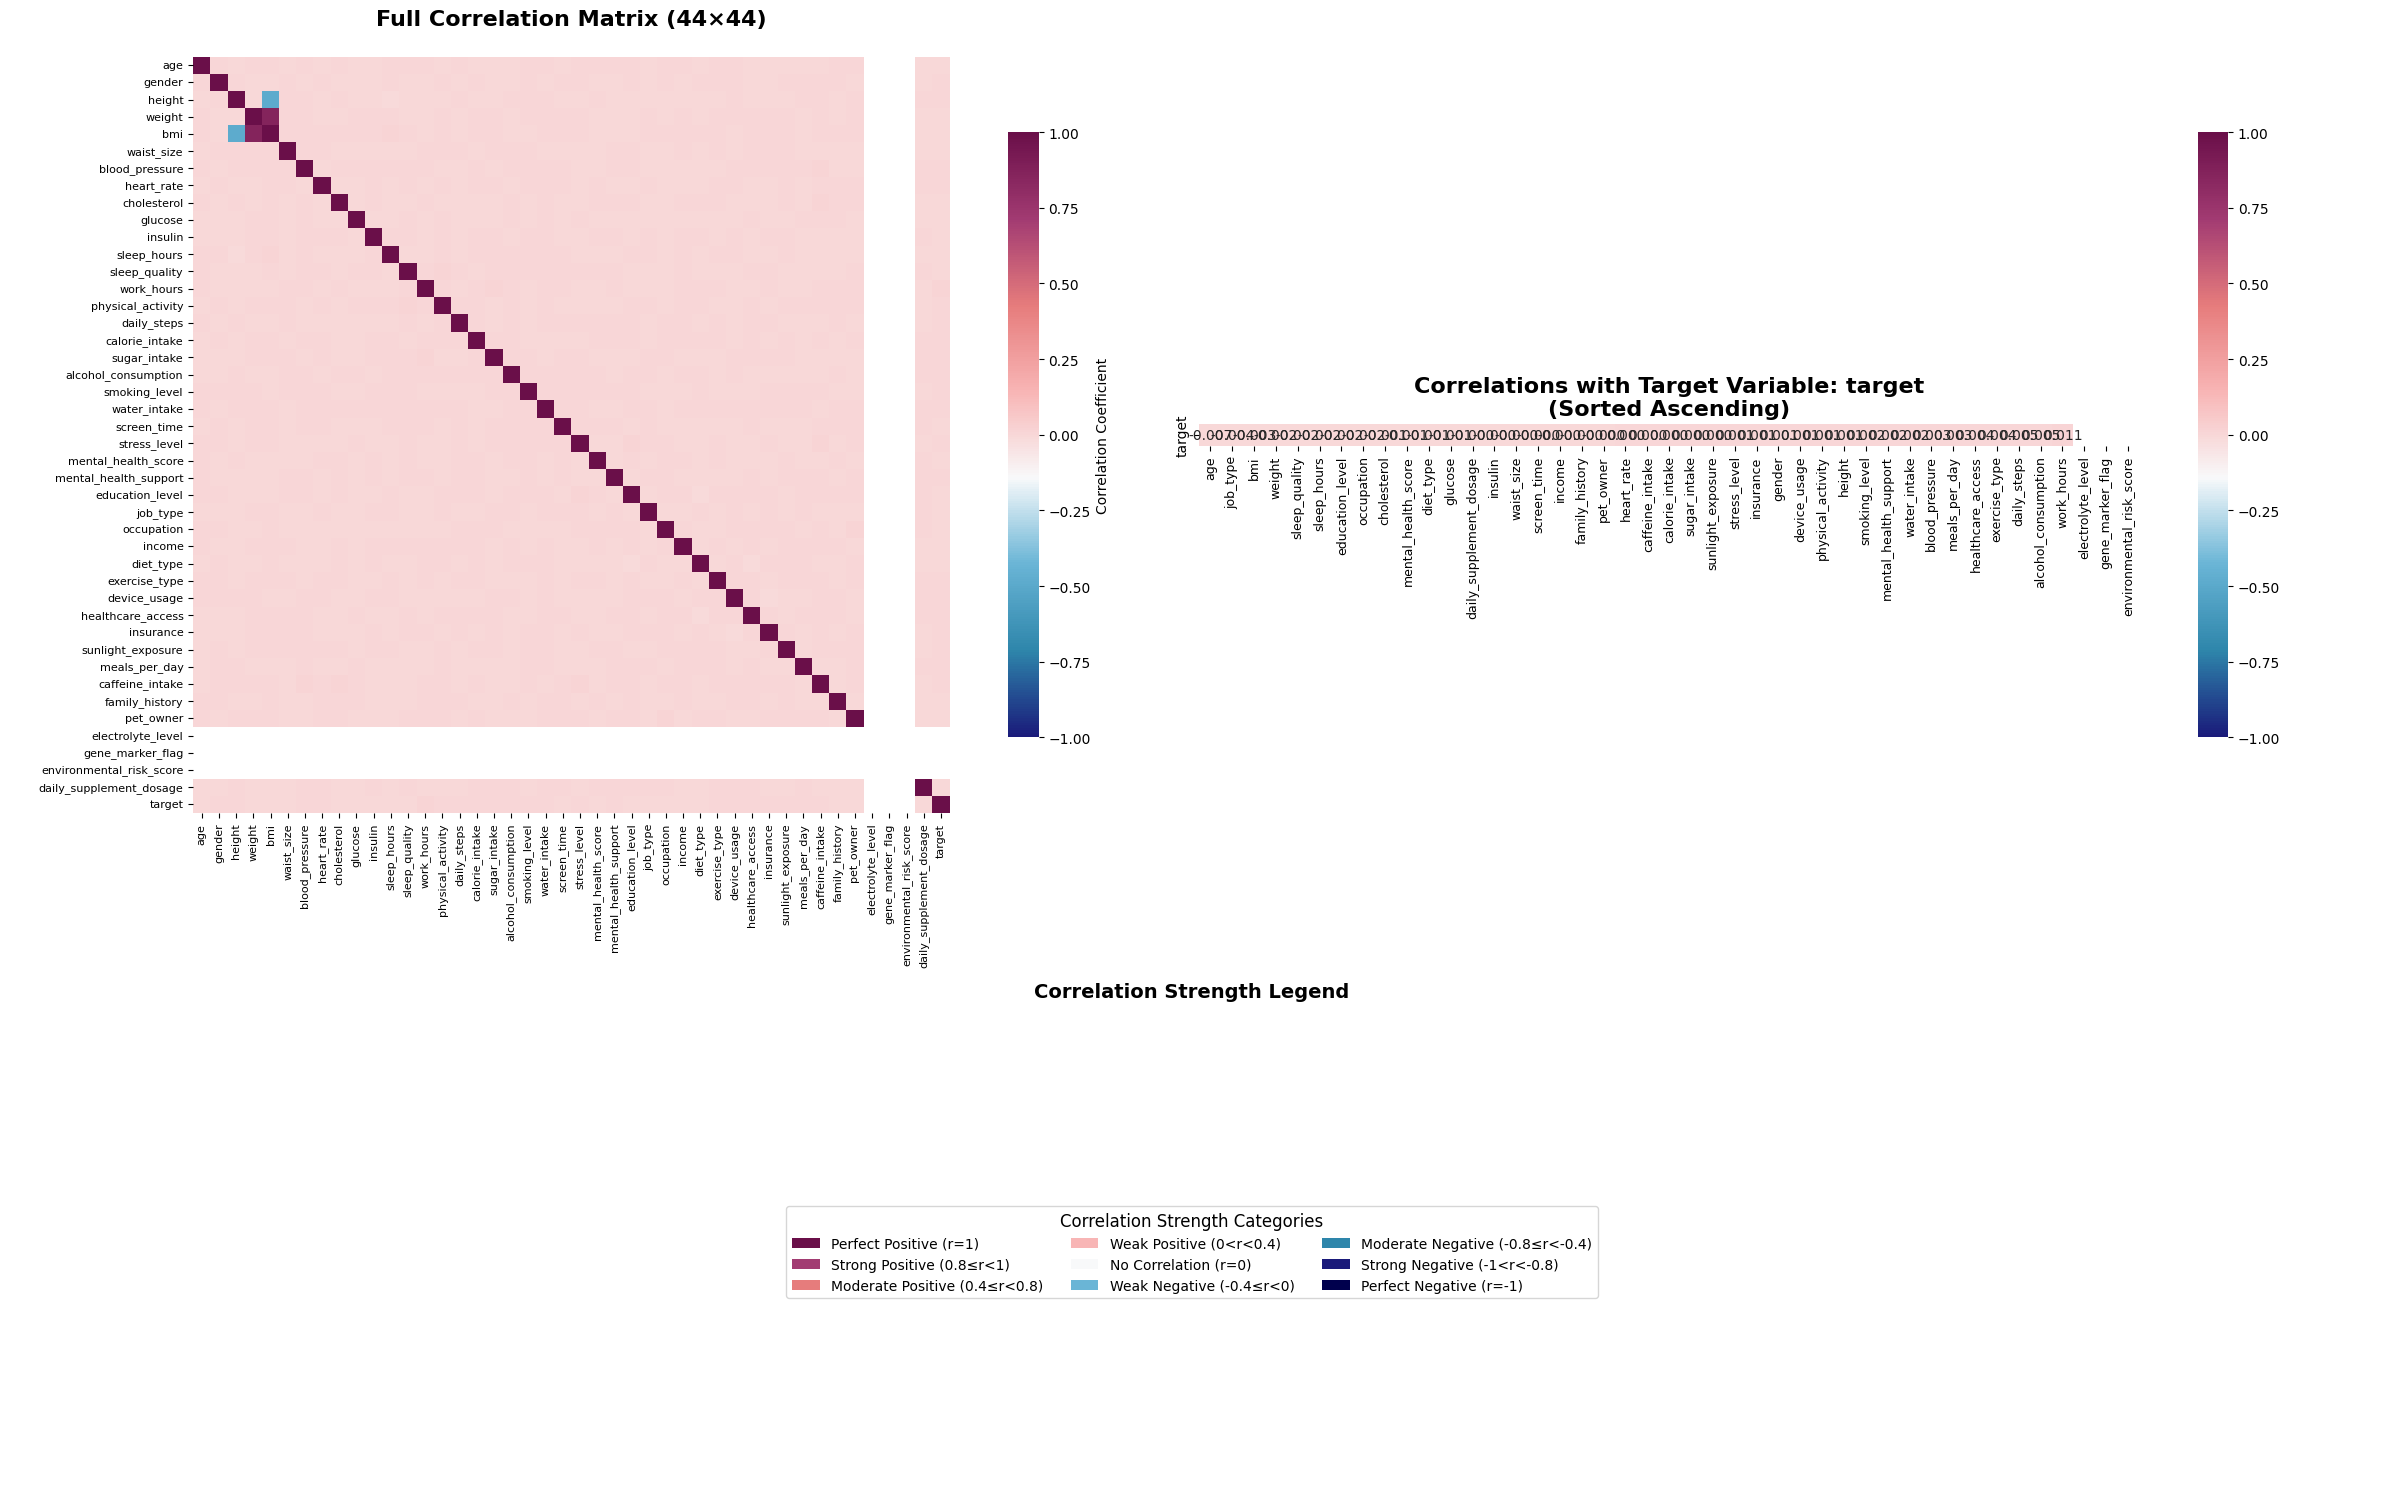


DETAILED CORRELATION CATEGORY ANALYSIS

OVERALL DISTRIBUTION:
------------------------------------------------------------
Perfect Positive (r=1)              :  0 features (  0.0%)
Strong Positive (0.8≤r<1)           :  0 features (  0.0%)
Moderate Positive (0.4≤r<0.8)       :  0 features (  0.0%)
Weak Positive (0<r<0.4)             : 21 features ( 48.8%)
No Correlation (r=0)                :  0 features (  0.0%)
Weak Negative (-0.4≤r<0)            : 19 features ( 44.2%)
Moderate Negative (-0.8≤r<-0.4)     :  0 features (  0.0%)
Strong Negative (-1<r<-0.8)         :  0 features (  0.0%)
Perfect Negative (r=-1)             :  0 features (  0.0%)

============== POSITIVE CORRELATIONS (Ascending Order) ===============

Weak Positive (0<r<0.4):
--------------------------------------------------
  heart_rate                     : +0.000
  caffeine_intake                : +0.000
  calorie_intake                 : +0.000
  sugar_intake                   : +0.000
  sunlight_exposure         

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
age,1.000,0.000,-0.007,0.003,0.006,-0.006,0.005,-0.005,0.006,-0.001,-0.001,0.002,0.001,0.002,-0.003,0.001,-0.003,-0.001,-0.002,0.003,0.003,-0.006,0.001,0.002,0.006,0.004,-0.006,0.002,0.002,-0.000,0.002,0.000,-0.000,-0.003,-0.003,-0.002,-0.006,0.001,0.002,nan,nan,nan,-0.003,-0.007
gender,0.000,1.000,0.002,-0.005,-0.004,0.004,-0.001,0.002,-0.001,-0.004,-0.002,0.003,-0.005,-0.001,0.001,-0.004,0.003,-0.003,-0.005,0.001,-0.003,0.003,0.005,-0.000,-0.003,0.002,-0.001,0.003,-0.000,0.003,0.003,0.001,-0.001,-0.001,0.004,0.007,0.007,0.003,-0.004,nan,nan,nan,-0.000,0.001
height,-0.007,0.002,1.000,-0.003,-0.487,0.001,0.001,-0.006,0.001,-0.003,-0.003,-0.009,-0.001,-0.001,-0.005,0.002,-0.004,-0.004,0.003,0.002,0.006,-0.003,-0.006,0.001,-0.000,-0.001,-0.002,-0.002,-0.006,-0.003,-0.001,0.005,-0.004,-0.005,-0.005,0.002,0.001,-0.003,0.000,nan,nan,nan,0.004,0.001
weight,0.003,-0.005,-0.003,1.000,0.866,0.005,0.003,-0.002,-0.000,0.002,0.003,0.005,-0.001,-0.005,0.002,-0.005,0.004,0.003,-0.002,0.000,0.006,0.000,0.000,-0.005,-0.001,-0.002,0.002,-0.000,0.003,-0.001,0.003,0.002,0.003,0.001,0.001,-0.004,0.003,-0.003,0.004,nan,nan,nan,-0.001,-0.002
bmi,0.006,-0.004,-0.487,0.866,1.000,0.003,0.002,0.002,0.000,0.004,0.004,0.008,0.001,-0.003,0.003,-0.005,0.005,0.005,-0.004,-0.000,0.002,0.002,0.003,-0.005,-0.001,-0.001,0.003,0.001,0.006,0.001,0.003,-0.001,0.004,0.004,0.003,-0.005,0.003,0.000,0.003,nan,nan,nan,-0.003,-0.003
waist_size,-0.006,0.004,0.001,0.005,0.003,1.000,0.002,0.002,-0.001,-0.002,-0.007,-0.000,-0.005,0.003,0.003,0.002,-0.001,0.000,0.005,0.005,-0.004,-0.003,-0.000,-0.001,0.000,0.003,-0.001,-0.001,0.004,-0.004,0.002,-0.005,0.007,0.005,0.004,-0.003,-0.002,-0.003,-0.002,nan,nan,nan,-0.002,-0.000
blood_pressure,0.005,-0.001,0.001,0.003,0.002,0.002,1.000,-0.002,0.001,0.003,0.004,0.000,0.004,0.004,-0.001,-0.001,0.001,-0.007,0.004,0.004,0.001,0.006,-0.002,-0.001,0.005,0.004,-0.001,-0.000,-0.003,-0.003,-0.007,0.001,0.003,0.001,0.002,0.001,0.009,-0.001,-0.001,nan,nan,nan,0.007,0.003
heart_rate,-0.005,0.002,-0.006,-0.002,0.002,0.002,-0.002,1.000,-0.001,-0.001,0.000,-0.003,0.002,-0.003,0.002,-0.006,0.005,0.000,-0.002,0.002,0.001,0.002,-0.002,0.004,-0.001,-0.004,0.002,-0.001,-0.002,-0.000,0.001,0.005,-0.001,-0.002,0.002,-0.001,0.001,0.003,0.006,nan,nan,nan,0.002,0.000
cholesterol,0.006,-0.001,0.001,-0.000,0.000,-0.001,0.001,-0.001,1.000,-0.003,0.006,-0.002,-0.001,0.003,-0.002,-0.001,-0.002,-0.001,0.002,-0.007,0.005,-0.000,-0.000,0.000,0.005,0.005,-0.003,-0.000,0.003,0.000,0.000,-0.001,-0.003,-0.001,0.001,-0.002,0.008,0.004,0.003,nan,nan,nan,-0.005,-0.001
glucose,-0.001,-0.004,-0.003,0.002,0.004,-0.002,0.003,-0.001,-0.003,1.000,-0.002,-0.004,0.002,-0.003,0.004,-0.000,-0.006,-0.001,0.003,-0.000,0.002,-0.001,0.001,-0.006,-0.001,-0.003,-0.001,-0.006,-0.002,-0.000,-0.003,-0.004,0.006,-0.000,-0.001,0.001,0.001,0.002,-0.004,nan,nan,nan,-0.003,-0.001



==================== ALL CORRELATIONS WITH TARGET VARIABLE =====================


,target
target,1.000
work_hours,0.011
alcohol_consumption,0.005
daily_steps,0.005
exercise_type,0.004
healthcare_access,0.004
meals_per_day,0.003
blood_pressure,0.003
water_intake,0.002
mental_health_support,0.002



SAVING ALL COMPONENTS TO CORRELATION_HEATMAP FOLDER
✓ Saved: correlation_matrix.csv
✓ Saved: target_correlations.csv
✓ Saved: detailed_correlation_analysis.txt
✓ Saved: full_correlation_matrix.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\1979367179.py:149: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


✓ Saved: target_correlations_bar_chart.png
✓ Saved: correlation_strength_legend.png
✓ Saved: all_features_correlation.png

All components saved successfully to 'correlation_heatmap' folder!

FOCUSED TARGET CORRELATION VISUALIZATION


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\1979367179.py:475: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


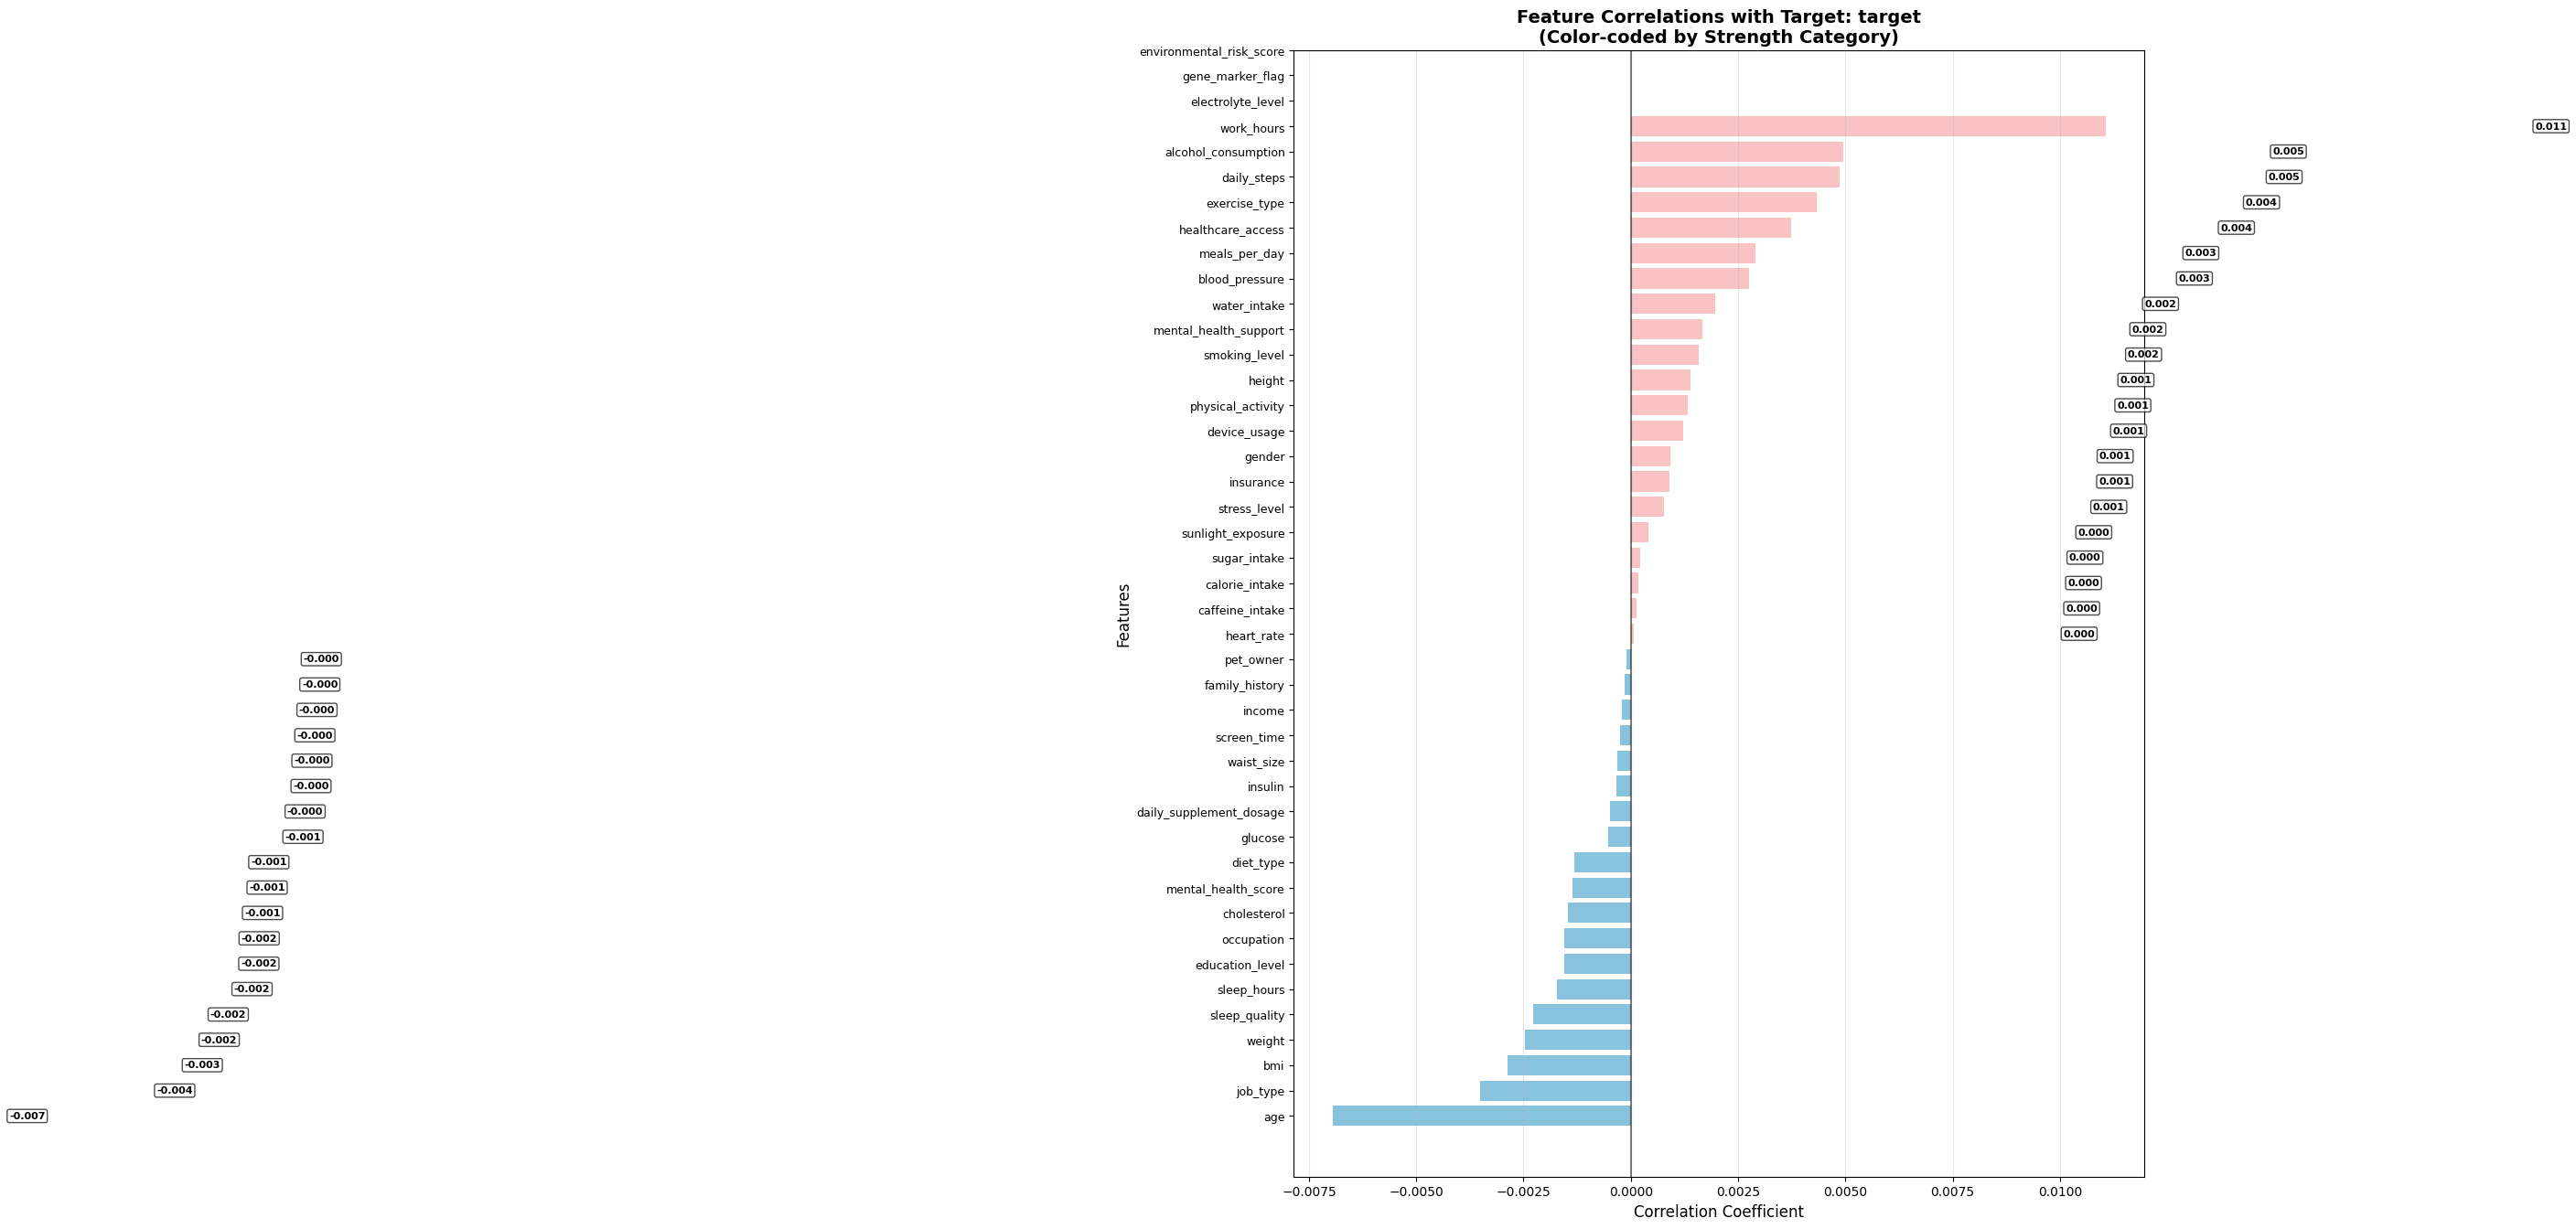


Analysis complete! All visualizations and statistics generated.


In [74]:
#Saving figures, matix
def save_all_correlation_components(corr_matrix, target_correlations, categories, target_column, df_shape):
    
    print("\n" + "="*80)
    print("SAVING ALL COMPONENTS TO CORRELATION_HEATMAP FOLDER")
    print("="*80)
    
    # Save correlation matrix as CSV
    corr_matrix.to_csv('correlation_heatmap/correlation_matrix.csv')
    print("✓ Saved: correlation_matrix.csv")
    
    # Save target correlations as CSV
    target_correlations.to_csv('correlation_heatmap/target_correlations.csv', header=['correlation'])
    print("✓ Saved: target_correlations.csv")
    
    # Save detailed analysis to text file
    save_detailed_analysis_to_text(corr_matrix, target_correlations, categories, target_column, df_shape)
    
    # Save individual figures
    save_individual_figures(corr_matrix, target_correlations, target_column)
    
    print("\nAll components saved successfully to 'correlation_heatmap' folder!")

def save_detailed_analysis_to_text(corr_matrix, target_correlations, categories, target_column, df_shape):
    """Save all text analysis to a comprehensive text file"""
    
    with open('correlation_heatmap/detailed_correlation_analysis.txt', 'w', encoding='utf-8') as f:
        f.write("DETAILED CORRELATION ANALYSIS REPORT\n")
        f.write("=" * 50 + "\n")
        f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Dataset shape: {df_shape}\n")
        f.write(f"Target variable: {target_column}\n")
        f.write(f"Number of features: {len(corr_matrix.columns) - 1}\n")
        f.write("\n" + "=" * 50 + "\n\n")
        
        # OVERALL DISTRIBUTION
        f.write("OVERALL DISTRIBUTION:\n")
        f.write("-" * 60 + "\n")
        total_features = len(target_correlations)
        category_counts = {category: mask.sum() for category, mask in categories.items()}
        
        for category, count in category_counts.items():
            percentage = (count / total_features) * 100
            f.write(f"{category:35} : {count:2d} features ({percentage:5.1f}%)\n")
        
        # POSITIVE CORRELATIONS
        f.write("\n" + " POSITIVE CORRELATIONS (Ascending Order) ".center(70, '=') + "\n")
        positive_corrs = target_correlations[target_correlations > 0].sort_values(ascending=True)
        
        if len(positive_corrs) > 0:
            for category_name in ['Perfect Positive (r=1)', 'Strong Positive (0.8≤r<1)', 
                                'Moderate Positive (0.4≤r<0.8)', 'Weak Positive (0<r<0.4)']:
                category_mask = categories[category_name]
                category_features = target_correlations[category_mask].sort_values(ascending=True)
                
                if len(category_features) > 0:
                    f.write(f"\n{category_name}:\n")
                    f.write("-" * 50 + "\n")
                    for feature, corr in category_features.items():
                        f.write(f"  {feature:30} : {corr:+.6f}\n")
        
        # NEGATIVE CORRELATIONS
        f.write("\n" + " NEGATIVE CORRELATIONS (Ascending Order) ".center(70, '=') + "\n")
        negative_corrs = target_correlations[target_correlations < 0].sort_values(ascending=True)
        
        if len(negative_corrs) > 0:
            for category_name in ['Weak Negative (-0.4≤r<0)', 'Moderate Negative (-0.8≤r<-0.4)', 
                                'Strong Negative (-1<r<-0.8)', 'Perfect Negative (r=-1)']:
                category_mask = categories[category_name]
                category_features = target_correlations[category_mask].sort_values(ascending=True)
                
                if len(category_features) > 0:
                    f.write(f"\n{category_name}:\n")
                    f.write("-" * 50 + "\n")
                    for feature, corr in category_features.items():
                        f.write(f"  {feature:30} : {corr:+.6f}\n")
        
        # NO CORRELATION
        f.write("\n" + " NO CORRELATION (r=0) ".center(70, '=') + "\n")
        no_corr_features = target_correlations[categories['No Correlation (r=0)']]
        if len(no_corr_features) > 0:
            for feature, corr in no_corr_features.items():
                f.write(f"  {feature:30} : {corr:+.6f}\n")
        else:
            f.write("No features with exactly zero correlation.\n")
        
        # SUMMARY STATISTICS
        f.write("\n" + " SUMMARY STATISTICS ".center(70, '=') + "\n")
        f.write("-" * 70 + "\n")
        f.write(f"Total features analyzed          : {total_features}\n")
        f.write(f"Features with positive correlation : {len(positive_corrs)}\n")
        f.write(f"Features with negative correlation : {len(negative_corrs)}\n")
        f.write(f"Features with no correlation (r=0) : {len(no_corr_features)}\n")
        f.write(f"Mean absolute correlation        : {target_correlations.abs().mean():.3f}\n")
        f.write(f"Standard deviation               : {target_correlations.std():.3f}\n")
        f.write(f"Strongest positive correlation   : {target_correlations.max():.3f}\n")
        f.write(f"Strongest negative correlation   : {target_correlations.min():.3f}\n")
        
        # ALL CORRELATIONS WITH TARGET VARIABLE
        f.write("\n" + " ALL CORRELATIONS WITH TARGET VARIABLE ".center(80, '=') + "\n")
        target_correlations_sorted = corr_matrix[target_column].sort_values(ascending=False)
        for feature, corr in target_correlations_sorted.items():
            if feature != target_column:
                f.write(f"{feature:30} : {corr:+.6f}\n")
    
    print("✓ Saved: detailed_correlation_analysis.txt")

def save_individual_figures(corr_matrix, target_correlations, target_column):
    """Save individual figures as high-resolution images"""
    
    # Custom colormap
    colors = [
        '#1a1a7a', '#2E86AB', '#6AB5D6', '#F8F9FA', 
        '#F8B5B5', '#E67C7C', '#A23B72', '#6A0F49'
    ]
    cmap = LinearSegmentedColormap.from_list('custom_correlation', colors, N=256)
    
    # Figure 1: Full correlation matrix
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, 
                annot=False,
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})
    plt.title('Full Correlation Matrix (44×44)\n', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.savefig('correlation_heatmap/full_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: full_correlation_matrix.png")
    
    # Figure 2: Target Correlations Bar Chart
    plt.figure(figsize=(40, 16))
    sorted_corrs = target_correlations.sort_values()
    
    plt.barh(range(len(sorted_corrs)), sorted_corrs.values, 
            color=[cmap((x+1)/2) for x in sorted_corrs.values], alpha=0.8)
    plt.yticks(range(len(sorted_corrs)), sorted_corrs.index, fontsize=6)
    plt.axvline(x=0, c='black', alpha=0.3)
    
    for i, (corr, label) in enumerate(zip(sorted_corrs.values, sorted_corrs.index)):
        plt.text(corr + (0.01 if corr>=0 else -0.02), i, f'{corr:.3f}', 
                ha='left' if corr>=0 else 'right', va='center', fontsize=6)
    
    plt.tight_layout()
    plt.savefig('correlation_heatmap/target_correlations_bar_chart.png', dpi=300)
    plt.close()
    print("✓ Saved: target_correlations_bar_chart.png")
    
    # Figure 3: Correlation Strength Legend
    plt.figure(figsize=(12, 4))
    plt.axis('off')
    
    legend_elements = [
        Rectangle((0, 0), 1, 1, facecolor='#6A0F49', label='Perfect Positive (r=1)'),
        Rectangle((0, 0), 1, 1, facecolor='#A23B72', label='Strong Positive (0.8≤r<1)'),
        Rectangle((0, 0), 1, 1, facecolor='#E67C7C', label='Moderate Positive (0.4≤r<0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8B5B5', label='Weak Positive (0<r<0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8F9FA', label='No Correlation (r=0)'),
        Rectangle((0, 0), 1, 1, facecolor='#6AB5D6', label='Weak Negative (-0.4≤r<0)'),
        Rectangle((0, 0), 1, 1, facecolor='#2E86AB', label='Moderate Negative (-0.8≤r<-0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#1a1a7a', label='Strong Negative (-1<r<-0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#00004d', label='Perfect Negative (r=-1)')
    ]
    
    plt.legend(handles=legend_elements, loc='center', ncol=3, 
               fontsize=10, frameon=True, fancybox=True, 
               title='Correlation Strength Categories', title_fontsize=12)
    plt.title('Correlation Strength Legend', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_heatmap/correlation_strength_legend.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: correlation_strength_legend.png")
    
    # Figure 4: features correlation matrix
    plt.figure(figsize=(50, 50))
    features_to_display = corr_matrix.index[:45]
    display_matrix = corr_matrix.loc[features_to_display, features_to_display]
    
    sns.heatmap(display_matrix, 
                annot=True,
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                fmt='.3f',
                cbar_kws={'shrink': 0.8})
    plt.title('CORRELATION MATRIX (First 10 features)\n', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap/all_features_correlation.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: all_features_correlation.png")


#Generating correlation heatmap
def plot_correlation_heatmap_with_categories(df_encoded_rounded, target_column='target'):
    """
    Generate correlation heatmap with specific strength categories and detailed analysis
    """
    
    print("="*80)
    print("CORRELATION ANALYSIS WITH SPECIFIED STRENGTH CATEGORIES")
    print("="*80)
    print(f"Dataset shape: {df_encoded_rounded.shape}")
    print(f"Number of features: {len(df_encoded_rounded.columns) - 1} (excluding target)")
    print(f"Target variable: '{target_column}'")
    print("\n" + "="*80)
    
    # Calculate correlation matrix
    corr_matrix = df_encoded_rounded.corr()
    target_correlations = corr_matrix[target_column].drop(target_column)
    
    # Define correlation strength categories as specified
    categories = {
        'Perfect Positive (r=1)': (target_correlations == 1),
        'Strong Positive (0.8≤r<1)': (target_correlations >= 0.8) & (target_correlations < 1),
        'Moderate Positive (0.4≤r<0.8)': (target_correlations >= 0.4) & (target_correlations < 0.8),
        'Weak Positive (0<r<0.4)': (target_correlations > 0) & (target_correlations < 0.4),
        'No Correlation (r=0)': (target_correlations == 0),
        'Weak Negative (-0.4≤r<0)': (target_correlations >= -0.4) & (target_correlations < 0),
        'Moderate Negative (-0.8≤r<-0.4)': (target_correlations >= -0.8) & (target_correlations < -0.4),
        'Strong Negative (-1<r<-0.8)': (target_correlations > -1) & (target_correlations < -0.8),
        'Perfect Negative (r=-1)': (target_correlations == -1)
    }
    
    # Create custom colormap based on the specified categories
    colors = [
        '#1a1a7a',  # Dark blue for strong negative
        '#2E86AB',  # Blue for moderate negative  
        '#6AB5D6',  # Light blue for weak negative
        '#F8F9FA',  # White for zero
        '#F8B5B5',  # Light red for weak positive
        '#E67C7C',  # Red for moderate positive
        '#A23B72',  # Dark red for strong positive
        '#6A0F49'   # Very dark red for perfect positive
    ]
    
    cmap = LinearSegmentedColormap.from_list('custom_correlation', colors, N=256)
    
    # Create the main visualization
    fig = plt.figure(figsize=(25, 15))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.6])
    
    # Plot 1: Full correlation matrix
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(corr_matrix, 
                annot=False,  # Too crowded for 44x44 matrix
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                ax=ax1)
    ax1.set_title('Full Correlation Matrix (44×44)\n', fontsize=16, fontweight='bold')
    ax1.tick_params(axis='x', rotation=90, labelsize=8)
    ax1.tick_params(axis='y', rotation=0, labelsize=8)
    
    # Plot 2: Correlations with target only
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Sort by correlation value for better visualization
    sorted_correlations = target_correlations.sort_values(ascending=True)
    sorted_corr_df = pd.DataFrame(sorted_correlations).T
    
    sns.heatmap(sorted_corr_df, 
                annot=True, 
                cmap=cmap, 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                fmt='.3f',
                cbar_kws={'shrink': 0.8},
                ax=ax2)
    ax2.set_title(f'Correlations with Target Variable: {target_column}\n(Sorted Ascending)', 
                  fontsize=16, fontweight='bold')
    ax2.tick_params(axis='x', rotation=90, labelsize=9)
    ax2.set_ylabel('')
    
    # Plot 3: Legend for correlation categories
    ax3 = fig.add_subplot(gs[1, :])
    ax3.axis('off')
    
    # Create legend
    legend_elements = [
        Rectangle((0, 0), 1, 1, facecolor='#6A0F49', label='Perfect Positive (r=1)'),
        Rectangle((0, 0), 1, 1, facecolor='#A23B72', label='Strong Positive (0.8≤r<1)'),
        Rectangle((0, 0), 1, 1, facecolor='#E67C7C', label='Moderate Positive (0.4≤r<0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8B5B5', label='Weak Positive (0<r<0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#F8F9FA', label='No Correlation (r=0)'),
        Rectangle((0, 0), 1, 1, facecolor='#6AB5D6', label='Weak Negative (-0.4≤r<0)'),
        Rectangle((0, 0), 1, 1, facecolor='#2E86AB', label='Moderate Negative (-0.8≤r<-0.4)'),
        Rectangle((0, 0), 1, 1, facecolor='#1a1a7a', label='Strong Negative (-1<r<-0.8)'),
        Rectangle((0, 0), 1, 1, facecolor='#00004d', label='Perfect Negative (r=-1)')
    ]
    
    ax3.legend(handles=legend_elements, loc='center', ncol=3, 
               fontsize=10, frameon=True, fancybox=True, 
               title='Correlation Strength Categories', title_fontsize=12)
    ax3.set_title('Correlation Strength Legend', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed categorical analysis
    print_categorical_analysis(target_correlations, categories)
    
    # Display correlation matrix
    display_correlation_matrix(corr_matrix, target_column)

    save_all_correlation_components(corr_matrix, target_correlations, categories, target_column, df_encoded_rounded.shape)
    
    return corr_matrix, target_correlations, categories

def print_categorical_analysis(target_correlations, categories):
    """
    Print detailed analysis separated by correlation categories
    """
    print("\n" + "="*80)
    print("DETAILED CORRELATION CATEGORY ANALYSIS")
    print("="*80)
    
    # Count features in each category
    category_counts = {category: mask.sum() for category, mask in categories.items()}
    
    # Overall statistics
    print(f"\nOVERALL DISTRIBUTION:")
    print("-" * 60)
    total_features = len(target_correlations)
    for category, count in category_counts.items():
        percentage = (count / total_features) * 100
        print(f"{category:35} : {count:2d} features ({percentage:5.1f}%)")
    
    # Positive correlations (ascending order)
    positive_corrs = target_correlations[target_correlations > 0].sort_values(ascending=True)
    print(f"\n{' POSITIVE CORRELATIONS (Ascending Order) ':=^70}")
    
    if len(positive_corrs) > 0:
        for category_name in ['Perfect Positive (r=1)', 'Strong Positive (0.8≤r<1)', 
                            'Moderate Positive (0.4≤r<0.8)', 'Weak Positive (0<r<0.4)']:
            category_mask = categories[category_name]
            category_features = target_correlations[category_mask].sort_values(ascending=True)
            
            if len(category_features) > 0:
                print(f"\n{category_name}:")
                print("-" * 50)
                for feature, corr in category_features.items():
                    print(f"  {feature:30} : {corr:+.3f}")
    else:
        print("No positive correlations found.")
    
    # Negative correlations (ascending order - most negative first)
    negative_corrs = target_correlations[target_correlations < 0].sort_values(ascending=True)
    print(f"\n{' NEGATIVE CORRELATIONS (Ascending Order) ':=^70}")
    
    if len(negative_corrs) > 0:
        for category_name in ['Weak Negative (-0.4≤r<0)', 'Moderate Negative (-0.8≤r<-0.4)', 
                            'Strong Negative (-1<r<-0.8)', 'Perfect Negative (r=-1)']:
            category_mask = categories[category_name]
            category_features = target_correlations[category_mask].sort_values(ascending=True)
            
            if len(category_features) > 0:
                print(f"\n{category_name}:")
                print("-" * 50)
                for feature, corr in category_features.items():
                    print(f"  {feature:30} : {corr:+.3f}")
    else:
        print("No negative correlations found.")
    
    # No correlation
    no_corr_features = target_correlations[categories['No Correlation (r=0)']]
    print(f"\n{' NO CORRELATION (r=0) ':=^70}")
    if len(no_corr_features) > 0:
        for feature, corr in no_corr_features.items():
            print(f"  {feature:30} : {corr}")
    else:
        print("No features with exactly zero correlation.")
    
    # Summary statistics
    print(f"\n{' SUMMARY STATISTICS ':=^70}")
    print("-" * 70)
    print(f"Total features analyzed          : {total_features}")
    print(f"Features with positive correlation : {len(positive_corrs)}")
    print(f"Features with negative correlation : {len(negative_corrs)}")
    print(f"Features with no correlation (r=0) : {len(no_corr_features)}")
    print(f"Mean absolute correlation        : {target_correlations.abs().mean():.3f}")
    print(f"Standard deviation               : {target_correlations.std():.3f}")
    print(f"Strongest positive correlation   : {target_correlations.max():.3f}")
    print(f"Strongest negative correlation   : {target_correlations.min():.3f}")

    return positive_corrs, negative_corrs, no_corr_features

def display_correlation_matrix(corr_matrix, target_column):
    """
    Display the correlation matrix in a readable format
    """
    print(f"\n{' CORRELATION MATRIX (with all features) ':=^80}")
    print("Full 44×44 matrix is too large to display completely.")
    print("Showing correlations with target variable and first 10 features:\n")
    
    # Display target correlations with features
    features_to_display = corr_matrix.index[:45]  
    display_matrix = corr_matrix.loc[features_to_display, features_to_display]
    
    # Format for better readability
    display_matrix_styled = display_matrix.style \
        .background_gradient(cmap='RdBu_r', vmin=-1, vmax=1) \
        .format('{:.3f}') \
        .set_caption(f'Correlation Matrix (First 10 features + {target_column})')
    
    display(display_matrix_styled)
    
    # Also show all correlations with target variable
    print(f"\n{' ALL CORRELATIONS WITH TARGET VARIABLE ':=^80}")
    target_correlations_sorted = corr_matrix[target_column].sort_values(ascending=False)
    
    # Create a styled series for display
    target_corr_styled = target_correlations_sorted.to_frame() \
        .style.background_gradient(cmap='RdBu_r', vmin=-1, vmax=1) \
        .format('{:.3f}') \
        .set_caption(f'All Correlations with {target_column} (Sorted)')
    
    display(target_corr_styled)

# Additional function to create a focused target correlation plot
def plot_target_correlation_focus(df_encoded_rounded, target_column='target'):
    """
    Create a focused plot showing only correlations with target variable
    """
    corr_matrix =df_encoded_rounded.corr()
    target_correlations = corr_matrix[target_column].drop(target_column).sort_values(ascending=True)
    
    # Define colors based on your categories
    def get_color_for_correlation(r):
        if r == 1: return '#6A0F49'
        elif r >= 0.8: return '#A23B72'
        elif r >= 0.4: return '#E67C7C'
        elif r > 0: return '#F8B5B5'
        elif r == 0: return '#F8F9FA'
        elif r >= -0.4: return '#6AB5D6'
        elif r >= -0.8: return '#2E86AB'
        elif r > -1: return '#1a1a7a'
        else: return '#00004d'
    
    colors = [get_color_for_correlation(r) for r in target_correlations]
    
    plt.figure(figsize=(12, 16))
    bars = plt.barh(range(len(target_correlations)), target_correlations.values, color=colors, alpha=0.8)
    
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Feature Correlations with Target: {target_column}\n(Color-coded by Strength Category)', 
              fontsize=14, fontweight='bold')
    plt.yticks(range(len(target_correlations)), target_correlations.index, fontsize=9)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
    plt.grid(axis='x', alpha=0.3)
    
    # Add correlation values on bars
    for i, (bar, corr) in enumerate(zip(bars, target_correlations)):
        plt.text(bar.get_width() + (0.01 if corr >= 0 else -0.03), 
                bar.get_y() + bar.get_height()/2, 
                f'{corr:.3f}', 
                ha='left' if corr >= 0 else 'right', 
                va='center', 
                fontweight='bold',
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
print("CORRELATION HEATMAP GENERATION")
print("="*50)

corr_matrix, target_correlations, categories = plot_correlation_heatmap_with_categories(df_encoded_rounded, 'target')

positive_corrs = target_correlations[target_correlations > 0].sort_values(ascending=True)
corr_matrix = df_encoded_rounded.corr()

# Create the focused target correlation plot
print("\n" + "="*80)
print("FOCUSED TARGET CORRELATION VISUALIZATION")
print("="*80)
plot_target_correlation_focus(df_encoded_rounded, 'target')
print("\nAnalysis complete! All visualizations and statistics generated.")

In [30]:
pos_corrs_vars = positive_corrs
print(pos_corrs_vars)

heart_rate               0.000078
caffeine_intake          0.000137
calorie_intake           0.000181
sugar_intake             0.000213
sunlight_exposure        0.000419
stress_level             0.000767
insurance                0.000904
gender                   0.000916
device_usage             0.001230
physical_activity        0.001328
height                   0.001400
smoking_level            0.001578
mental_health_support    0.001678
water_intake             0.001973
blood_pressure           0.002764
meals_per_day            0.002914
healthcare_access        0.003740
exercise_type            0.004325
daily_steps              0.004856
alcohol_consumption      0.004954
work_hours               0.011073
Name: target, dtype: float64


-Since 21 variables show positive correlation with the target variable, the analysis is carried out only for those 21 variables.

-Classifying the above variables into biometrics and lifestyle habits:

1. Biometrics - heart_rate, height, blood_pressure

2. Lifestyle habbits - caffeine_intake, calorie_intake, sugar_intake, sunlight_exposure, stress_level, insurance, gender, device_usage,         physical_activity, smoking_level, mental_health_support, water_intake, meals_per_day, healthcare_access, exercise_type, daily_steps, alcohol_consumption, work_hours

In [31]:
#Classifying variables with positive correlations into categorical and numerical
def classify_variables(positive_corrs, df):
    """
    Classify variables in positive_corrs into categorical and numerical
    """
    categorical_vars = []
    numerical_vars = []
    
    for variable in positive_corrs.index:
        if variable in df.columns:
            # Check original data type before encoding
            if df[variable].dtype in ['object', 'category']:
                categorical_vars.append(variable)
            else:
                numerical_vars.append(variable)
    
    return categorical_vars, numerical_vars

categorical_vars, numerical_vars = classify_variables(positive_corrs, df)

In [32]:
print("Categorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)
print(f"Categorical variables count: {len(categorical_vars)}")
print(f"Numerical variables count: {len(numerical_vars)}")


Categorical variables: ['caffeine_intake', 'sunlight_exposure', 'insurance', 'gender', 'device_usage', 'smoking_level', 'mental_health_support', 'healthcare_access', 'exercise_type', 'alcohol_consumption']
Numerical variables: ['heart_rate', 'calorie_intake', 'sugar_intake', 'stress_level', 'physical_activity', 'height', 'water_intake', 'blood_pressure', 'meals_per_day', 'daily_steps', 'work_hours']
Categorical variables count: 10
Numerical variables count: 11


 Analysing categorical features

In [33]:
#Drawing pie charts for per categorical variables
output_folder = r"pie_charts\one_variable"

for col in categorical_vars:
    plt.figure(figsize=(8, 8))
    
    counts = df[col].value_counts()
    
    # Unpack the return values of plt.pie
    wedges, texts, autotexts = plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.8
    )
    
    # Style percentages inside slices
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    # Add title
    plt.title(f"Pie Chart of {col}", fontsize=14)
    
    # Place legend outside the pie
    plt.legend(
        wedges, 
        counts.index, 
        title="Categories", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    # Save figure
    save_path = os.path.join(output_folder, f"{col}_pie.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

print(f"Pie charts saved in: {os.path.abspath(output_folder)}")


Pie charts saved in: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\pie_charts\one_variable


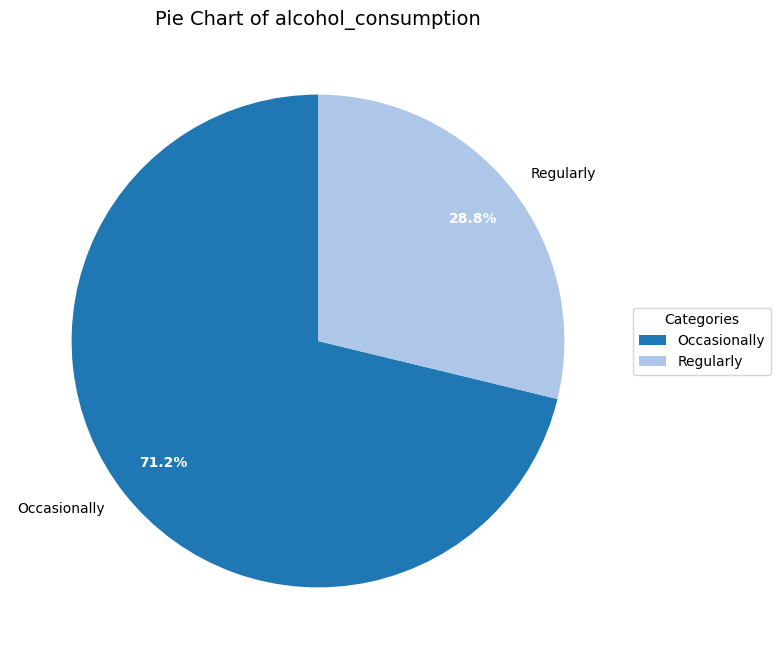

In [15]:
display(Image(filename="pie_charts/one_variable/alcohol_consumption_pie.png"))


Analysing numerical variables

In [75]:
#Drawing box plots per numerical variable with positive correlations
# Output folder
output_folder = r"box_plots\one_variable"

for col in numerical_vars:
    data = df_encoded_rounded[col].dropna()
    
    # Calculate quartiles and fences
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)  # Median
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Inner fences
    lower_inner = Q1 - 1.5 * IQR
    upper_inner = Q3 + 1.5 * IQR

    # Outer fences
    lower_outer = Q1 - 3 * IQR
    upper_outer = Q3 + 3 * IQR

    # Calculate mean
    mean_val = np.mean(data)

    # Create figure
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data, color="skyblue", showfliers=True)

    # Add reference lines
    plt.axvline(Q1, color='blue', linestyle='--', label=f"Q1 = {Q1:.2f}")
    plt.axvline(Q2, color='green', linestyle='--', label=f"Median = {Q2:.2f}")
    plt.axvline(Q3, color='blue', linestyle='--', label=f"Q3 = {Q3:.2f}")
    plt.axvline(lower_inner, color='orange', linestyle=':', label=f"Lower Inner Fence = {lower_inner:.2f}")
    plt.axvline(upper_inner, color='orange', linestyle=':', label=f"Upper Inner Fence = {upper_inner:.2f}")
    plt.axvline(lower_outer, color='red', linestyle=':', label=f"Lower Outer Fence = {lower_outer:.2f}")
    plt.axvline(upper_outer, color='red', linestyle=':', label=f"Upper Outer Fence = {upper_outer:.2f}")
    plt.axvline(mean_val, color='purple', linestyle='-', label=f"Mean = {mean_val:.2f}")

    # Titles and legend
    plt.title(f"Box Plot of {col}", fontsize=14)
    plt.legend(loc="best", fontsize=8)

    # Save figure
    save_path = os.path.join(output_folder, f"{col}_box.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

print(f"Box plots saved in: {os.path.abspath(output_folder)}")

Box plots saved in: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\box_plots\one_variable


In [35]:
corr_matrix_out = corr_matrix
print(corr_matrix_out)

                               age    gender    height    weight       bmi  \
age                       1.000000  0.000124 -0.007208  0.003179  0.006220   
gender                    0.000124  1.000000  0.002337 -0.005103 -0.004463   
height                   -0.007208  0.002337  1.000000 -0.003023 -0.487366   
weight                    0.003179 -0.005103 -0.003023  1.000000  0.866349   
bmi                       0.006220 -0.004463 -0.487366  0.866349  1.000000   
waist_size               -0.006347  0.004162  0.001261  0.005047  0.003441   
blood_pressure            0.004827 -0.001263  0.001447  0.002873  0.001688   
heart_rate               -0.005409  0.001717 -0.006462 -0.001962  0.001506   
cholesterol               0.005710 -0.001407  0.000704 -0.000324  0.000261   
glucose                  -0.000954 -0.004244 -0.003080  0.002120  0.003631   
insulin                  -0.001334 -0.001751 -0.003056  0.003374  0.003622   
sleep_hours               0.001929  0.002796 -0.008744  0.004970

In [36]:
#Generating a matrix to identify correlations among variables with positive correlations
# List of variables in positive_corrs
vars_list = pos_corrs_vars.index.tolist()

# Extract the sub-matrix
positive_corrs_matrix = corr_matrix.loc[vars_list, vars_list]

# Display the matrix
pd.set_option('display.float_format', '{:.3f}'.format)
display(positive_corrs_matrix)


,heart_rate,caffeine_intake,calorie_intake,sugar_intake,sunlight_exposure,stress_level,insurance,gender,device_usage,physical_activity,...,smoking_level,mental_health_support,water_intake,blood_pressure,meals_per_day,healthcare_access,exercise_type,daily_steps,alcohol_consumption,work_hours
heart_rate,1.000,0.001,0.005,0.000,0.002,-0.002,-0.002,0.002,0.005,0.002,...,0.002,-0.001,0.001,-0.002,-0.001,-0.001,0.001,-0.006,-0.002,-0.003
caffeine_intake,0.001,1.000,0.002,-0.001,0.003,0.009,0.001,0.007,0.001,0.000,...,0.005,0.002,-0.005,0.009,-0.001,0.006,0.004,-0.001,-0.003,0.002
calorie_intake,0.005,0.002,1.000,0.003,0.003,-0.004,-0.001,0.003,-0.004,0.001,...,-0.001,0.003,-0.002,0.001,-0.004,0.000,0.001,0.001,0.006,0.001
sugar_intake,0.000,-0.001,0.003,1.000,0.004,0.001,0.004,-0.003,0.005,-0.004,...,0.001,-0.002,-0.002,-0.007,-0.003,0.001,-0.001,-0.001,0.000,0.008
sunlight_exposure,0.002,0.003,0.003,0.004,1.000,-0.004,0.002,0.004,-0.002,0.004,...,0.004,0.001,0.002,0.002,-0.004,-0.001,0.001,-0.004,-0.004,-0.001
stress_level,-0.002,0.009,-0.004,0.001,-0.004,1.000,0.004,0.005,-0.003,-0.004,...,0.000,-0.002,0.003,-0.002,-0.002,-0.004,0.004,0.004,0.001,-0.003
insurance,-0.002,0.001,-0.001,0.004,0.002,0.004,1.000,-0.001,-0.010,-0.006,...,0.001,-0.004,0.000,0.001,-0.005,0.004,-0.008,0.001,-0.003,0.001
gender,0.002,0.007,0.003,-0.003,0.004,0.005,-0.001,1.000,0.001,0.001,...,0.001,-0.003,-0.003,-0.001,0.007,-0.001,0.003,-0.004,-0.005,-0.001
device_usage,0.005,0.001,-0.004,0.005,-0.002,-0.003,-0.010,0.001,1.000,-0.006,...,-0.002,-0.001,0.006,0.001,-0.001,0.004,0.001,-0.001,0.004,-0.003
physical_activity,0.002,0.000,0.001,-0.004,0.004,-0.004,-0.006,0.001,-0.006,1.000,...,-0.003,-0.002,0.004,-0.001,0.001,0.000,-0.005,0.002,0.005,0.005


In [37]:
#Cheking class imbalance

def analyze_class_imbalance(df, target, output_folder='class_imbalance_report'):
    """
    Comprehensive class imbalance analysis with saving plots and text summary
    """
    y = df[target]
    class_counts = y.value_counts()
    class_percentages = y.value_counts(normalize=True) * 100
    
    # Imbalance metrics
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[-1]
    gini_impurity = 1 - sum((class_counts/len(y))**2)
    
    # Prepare textual summary
    summary_text = [
        " CLASS IMBALANCE ANALYSIS",
        "-"*40,
        f"Total samples: {len(y):,}",
        f"Number of classes: {len(class_counts)}",
        f"Majority class: {class_counts.index[0]} ({class_percentages.iloc[0]:.2f}%)",
        f"Minority class: {class_counts.index[-1]} ({class_percentages.iloc[-1]:.2f}%)",
        f"Imbalance Ratio: {imbalance_ratio:.2f}:1",
        f"Gini Impurity: {gini_impurity:.4f}",
        "",
        " IMBALANCE INTERPRETATION"
    ]
    
    if imbalance_ratio > 2:
        summary_text.append(f" The dataset is imbalanced. Majority class is {imbalance_ratio:.2f}x larger than minority class.")
    else:
        summary_text.append(" The dataset is relatively balanced.")
    
    # Save summary to text file
    summary_file = os.path.join(output_folder, 'class_imbalance_summary.txt')
    with open(summary_file, 'w') as f:
        f.write("\n".join(summary_text))
    
    # Generate and save plots
    plot_class_distribution(df, target, imbalance_ratio, output_folder)
    
    print(f" Class imbalance analysis completed. Summary and plots saved in '{output_folder}'")
    
    return {
        'class_counts': class_counts,
        'class_percentages': class_percentages,
        'imbalance_ratio': imbalance_ratio,
        'gini_impurity': gini_impurity
    }

def plot_class_distribution(df, target, imbalance_ratio, output_folder):
    """
    Create multiple visualizations for class distribution and save them
    """
    y = df[target]
    class_counts = y.value_counts()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Class Distribution Analysis', fontsize=16, fontweight='bold')
    
    # 1. Bar plot
    sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0,0])
    axes[0,0].set_title('Class Distribution - Bar Plot')
    axes[0,0].set_xlabel('Class')
    axes[0,0].set_ylabel('Count')
    for i, v in enumerate(class_counts.values):
        axes[0,0].text(i, v + max(class_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Save bar plot
    bar_plot_file = os.path.join(output_folder, 'bar_plot.png')
    fig.savefig(bar_plot_file)
    
    # 2. Pie chart
    axes[0,1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
                  startangle=90, colors=sns.color_palette("pastel"))
    axes[0,1].set_title('Class Distribution - Pie Chart')
    pie_plot_file = os.path.join(output_folder, 'pie_chart.png')
    fig.savefig(pie_plot_file)
    
    # 3. Proportion plot
    proportions = y.value_counts(normalize=True)
    sns.barplot(x=proportions.index, y=proportions.values, ax=axes[1,0])
    axes[1,0].set_title('Class Proportions')
    axes[1,0].set_ylabel('Proportion')
    
    # Save the full figure
    full_plot_file = os.path.join(output_folder, 'class_distribution_plots.png')
    plt.tight_layout()
    plt.savefig(full_plot_file)
    plt.close()



In [38]:
results = analyze_class_imbalance(df, target='target', output_folder='class_imbalance_check')


 Class imbalance analysis completed. Summary and plots saved in 'class_imbalance_check'


In [82]:
#comparing categorical variables with target variable.
def generate_formatted_two_way_tables(df, categorical_vars, target_var, output_file='two_way_tables.txt'):
    
    with open(output_file, 'w') as f:
        f.write("TWO-WAY FREQUENCY TABLES REPORT\n")
        f.write("=" * 60 + "\n")
        f.write(f"Dataset: {len(df)} records\n")
        f.write(f"Target Variable: {target_var}\n")
        f.write(f"Categorical Variables Analyzed: {len(categorical_vars)}\n")
        f.write("=" * 60 + "\n\n")
        
        results = {}
        
        for i, cat_var in enumerate(categorical_vars, 1):
            if cat_var in df.columns and cat_var != target_var:
                f.write(f"\nTABLE {i}: {cat_var.upper()} vs {target_var.upper()}\n")
                f.write("-" * 40 + "\n")
                
                # Frequency table
                freq_table = pd.crosstab(df[cat_var], df[target_var], margins=True)
                f.write("FREQUENCY COUNTS:\n")
                
                # Convert table to string with better formatting
                table_str = str(freq_table)
                f.write(table_str)
                f.write("\n\n")
                
                # Percentage table
                pct_table = pd.crosstab(df[cat_var], df[target_var], normalize='columns') * 100
                f.write("COLOMUN PERCENTAGES:\n")
                pct_str = str(pct_table.round(2))
                f.write(pct_str)
                f.write("\n" + "-" * 40 + "\n\n")
                
                results[cat_var] = {
                    'frequency_table': freq_table,
                    'percentage_table': pct_table
                }
        
        # Summary
        f.write("\nSUMMARY\n")
        f.write("=" * 40 + "\n")
        f.write(f"Total tables generated: {len(results)}\n")
        f.write(f"Output file: {output_file}\n")
    
    print(f"Formatted two-way tables saved to: {output_file}")
    return results

In [83]:
results = generate_formatted_two_way_tables(df, categorical_vars, 'target', 'two_way_tables.txt')

Formatted two-way tables saved to: two_way_tables.txt


In [59]:
#comparing numerical variables with target variable.
def boxplot_comparison(df_encoded, df_encoded_rounded, numerical_vars, target_var):
   
    # Define the specific directory path
    save_directory = r"C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison"
    
    # Create folder if it doesn't exist
    os.makedirs(save_directory, exist_ok=True)
    
    plots_created = 0
    
    for num_var in numerical_vars:
        if num_var in df_encoded_rounded.columns and num_var != target_var:
            # Create figure with appropriate size
            plt.figure(figsize=(10, 8))
            
            # Create a combined dataframe for plotting
            df_plot = df_encoded_rounded[[num_var]].copy()
            df_plot[target_var] = df_encoded[target_var]
            
            # Use real category names if mapping provided
            if target_mapping is not None:
                reverse_mapping = {v: k for k, v in target_mapping.items()}
                df_plot['target_category'] = df_plot[target_var].map(reverse_mapping)
                x_var = 'target_category'
                x_label = 'Target Category'
            else:
                # If no mapping, try to get original categories from df_encoded
                if target_var in df_encoded.columns:
                    x_var = target_var
                    x_label = target_var
                else:
                    x_var = target_var
                    x_label = target_var
            
            # Create boxplot with rounded numerical values
            ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")
            
            # Calculate and display statistics for each category
            categories = df_plot[x_var].unique()
            
            for i, category in enumerate(categories):
                category_data = df_plot[df_plot[x_var] == category][num_var].dropna()
                
                if len(category_data) > 0:
                    # Calculate statistics using rounded values
                    q1 = np.percentile(category_data, 25)
                    q3 = np.percentile(category_data, 75)
                    median = np.median(category_data)
                    mean = np.mean(category_data)
                    
                    # Calculate mode (most frequent value)
                    try:
                        mode_val = stats.mode(category_data, keepdims=True)[0][0]
                    except:
                        mode_val = category_data.value_counts().index[0]
                    
                    # Create annotation text
                    stats_text = f'Q1: {q1:.2f}\nQ3: {q3:.2f}\nMed: {median:.2f}\nMean: {mean:.2f}\nMode: {mode_val:.2f}'
                    
                    # Position the annotation above the boxplot
                    y_pos = df_plot[num_var].max() * 1.08
                    
                    # Add text annotation
                    plt.text(i, y_pos, stats_text, 
                            ha='center', va='bottom', 
                            fontsize=8, 
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
                            fontfamily='monospace')
            
            # Customize the plot
            plt.title(f'Distribution of {num_var} by {x_label}\n(Rounded Values with Statistical Summary)', 
                     fontsize=12, fontweight='bold', pad=20)
            plt.xlabel(x_label, fontsize=10, fontweight='bold')
            plt.ylabel(f'{num_var.replace("_", " ").title()} (Rounded)', fontsize=10, fontweight='bold')
            
            # Adjust y-axis limits to accommodate annotations
            y_max = df_plot[num_var].max()
            y_min = df_plot[num_var].min()
            plt.ylim(y_min * 0.95, y_max * 1.2)
            
            # Rotate x-axis labels if they are long
            if any(len(str(x)) > 10 for x in categories):
                plt.xticks(rotation=45, ha='right')
            
            # Add grid for better readability
            plt.grid(axis='y', alpha=0.3)
            
            plt.tight_layout()
            
            # Save to the specific directory
            file_path = os.path.join(save_directory, f'{num_var}_vs_{target_var}.png')
            plt.savefig(file_path, dpi=300, bbox_inches='tight')
            plt.close()
            
            plots_created += 1
            print(f" Saved: {file_path}")
    
    print(f"\nSuccessfully saved {plots_created} box plots to:")
    print(f"   {save_directory}")
    
    return plots_created


In [61]:
simple_boxplot_comparison(df_encoded, df_encoded_rounded, numerical_vars, 'target')

C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\heart_rate_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\calorie_intake_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\sugar_intake_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\stress_level_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\physical_activity_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\height_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\water_intake_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\blood_pressure_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\meals_per_day_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\daily_steps_vs_target.png


C:\Users\amash\AppData\Local\Temp\ipykernel_9368\2344900964.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x=x_var, y=num_var, palette="Set2")


✅ Saved: C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison\work_hours_vs_target.png

🎉 Successfully saved 11 box plots to:
   C:\Users\amash\disease-risk\reports\figures\after_preprocessed\comparison


11